In [ ]:
# take only boys/ girls from pes22 and check if weight affects more for girls/ boys.
# height to bmi, monke stunts with it, do it.

In [ ]:
loaded_model = joblib.load

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = "/content/drive/MyDrive/Six_Schools.xlsx"
df = pd.ExcelFile(filepath)

In [ ]:
df.sheet_names

['NCB22',
 'DSC21',
 'PES21',
 'PES22_A',
 'PES22_B',
 'NID20',
 'NID21',
 'KSP21',
 'KSP22',
 'Puma_Indian',
 'all_Schools',
 'RVU22']

In [ ]:
dfA = df.parse('PES22_A')
dfA.head()

,ID,Sex,Age,Home_state,Home_town,Mother_tongue,Height_cm,Weight_Kg,BMI
0,4,M,21.0,Karnataka,Chikmagalur,Kannada,165,62.0,22.77
1,9,M,25.0,Karnataka,Bengaluru,Tamil,178,80.0,25.25
2,10,M,23.0,Karnataka,Hassan,Kannada,187,68.0,19.45
3,17,F,21.0,Karnataka,Chintamani,Kannada,163,45.0,16.94
4,18,M,21.0,Karnataka,Vijayanagara,Kannada,162,58.0,22.10


In [ ]:
dfB = df.parse('PES22_B')
dfB.sample(5)

,ID,Sex,Age,Home_state,Home_town,Mother_tongue,Height_cm,Weight_Kg,BMI
8,255,F,22,Karnataka,Bengaluru,Telugu,155,79,32.88
46,288,M,22,Karnataka,Bengaluru,Kannada,179,73,22.78
47,326,M,21,Karnataka,Kalaburgi,Bangla,180,83,25.62
19,242,M,22,Karnataka,Bengaluru,Kannada,161,55,21.22
14,327,F,23,Karnataka,Bijapur,Kannada,158,49,19.63


In [ ]:
dfPES22 = pd.concat([dfA, dfB])

# Separating by sex

In [ ]:
boysdf = dfPES22[dfPES22['Sex'] == 'M']
girlsdf = dfPES22[dfPES22['Sex'] == 'F']

In [ ]:
boysdf = boysdf[['Height_cm', 'Weight_Kg', 'BMI']]
girlsdf = girlsdf[['Height_cm', 'Weight_Kg', 'BMI']]

In [ ]:
B_train = boysdf.Height_cm.values.reshape(-1,1)
y_train = boysdf.BMI.values.reshape(-1,1)
B_train, B_test, y_train, y_test = train_test_split(B_train, y_train, test_size = 0.3, random_state = 0)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(B_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(B_test)
y_pred[:3]

array([[22.6712636 ],
       [22.81372438],
       [24.52325371]])

In [ ]:
r = model.score(B_test, y_test)
print("R2 Score:", r)

R2 Score: -0.3131013421253037


# Training using only Height

In [ ]:
G_train = girlsdf.Height_cm.values.reshape(-1,1)
y_train = girlsdf.BMI.values.reshape(-1,1)
G_train, G_test, y_train, y_test = train_test_split(G_train, y_train, test_size = 0.3, random_state = 0)

In [ ]:
model.fit(G_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(G_test)
y_pred[:3]

array([[22.5564304 ],
       [19.85237147],
       [22.89443776]])

In [ ]:
r2 = model.score(G_test, y_test)
print("R2 Score:", r2)

R2 Score: 0.0805112848406605


# Training using height and weight

In [ ]:
B_train = boysdf[['Height_cm', 'Weight_Kg']]
y_train = boysdf['BMI']
B_train, B_test, y_train, y_test = train_test_split(B_train, y_train, test_size = 0.3, random_state = 0)

In [ ]:
model.fit(B_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(B_test)
y_pred[:5]

array([27.24569204, 19.98072717, 18.0844318 , 21.74615073, 23.94596725])

In [ ]:
r2 = model.score(B_test, y_test)
print("R2 Score:", r2)

R2 Score: 0.9904452894366628


In [ ]:
G_train = boysdf[['Height_cm', 'Weight_Kg']]
y_train = boysdf['BMI']
G_train, G_test, y_train, y_test = train_test_split(G_train, y_train, test_size = 0.3, random_state = 0)

In [ ]:
model.fit(G_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(G_test)

In [ ]:
r2 = model.score(G_test, y_test)
print("R2 Score:", r2)

R2 Score: 0.9904452894366628


<Axes: >

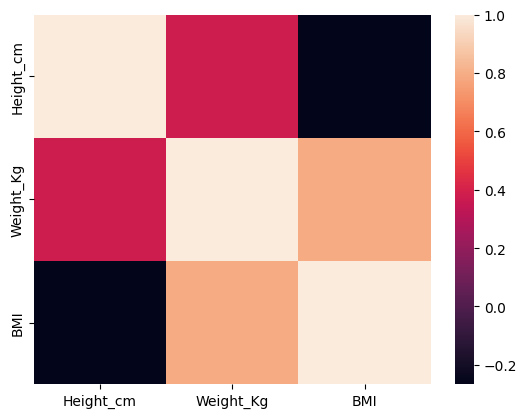

In [ ]:
sns.heatmap(boysdf.corr())

<Axes: >

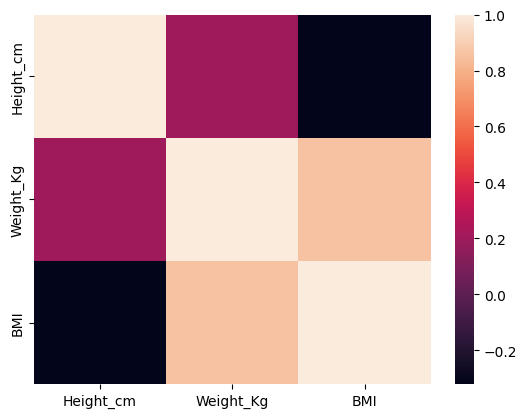

In [ ]:
sns.heatmap(girlsdf.corr())



*   After trying with only height, with both boys and girls, accuracy rates are lower than my bank balance indicating that height doesn't play much of a role in both, boys and girls, BMI values.
*   Weights are the heavy damage dealers for both, boys and girls, BMI values.
*   Next, trying testing with girlsdf.







In [ ]:
X_train = boysdf[['Height_cm', 'Weight_Kg']]
y_train = boysdf['BMI']
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test = girlsdf[['Height_cm', 'Weight_Kg']]
y_pred = model.predict(X_test)

In [ ]:
y_pred[:5]

array([17.50514377, 19.60321765, 25.08353385, 20.94499651, 18.04477733])

In [ ]:
r2 = model.score(X_train, y_train)
print("R2 Score: ", r2)

R2 Score:  0.9896247327232175




*   Testing using boysdf



In [ ]:
X_train = girlsdf[['Height_cm', 'Weight_Kg']]
y_train = girlsdf['BMI']
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test = boysdf[['Height_cm', 'Weight_Kg']]
y_pred = model.predict(X_test)

In [ ]:
y_pred[:5]

array([22.94397227, 26.49417724, 18.9882262 , 22.18735951, 19.51198016])

In [ ]:
r2 = model.score(X_train, y_train)
print("R2 Score: ", r2)

R2 Score:  0.9924583444159435




*   Training using the boys data and testing using girls data is 98% accurate but 99% for the opposite.

Hence, Weight affects both boys and girls with not much of a difference.



# Joblib

Using MSc23 model.

In [ ]:
model_file = ('/content/drive/MyDrive/MSc23_Ht_BMI_Lin_Regress.joblib')
joblib.dump(model, model_file)

['/content/drive/MyDrive/MSc23_Ht_BMI_Lin_Regress.joblib']

In [ ]:
X_train = dfPES22[['Height_cm', 'Weight_Kg']]
y_train = dfPES22['BMI']

In [ ]:
loaded_model = joblib.load(model_file)

In [ ]:
loaded_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
score = loaded_model.score(X_train, y_train)
print(f'Score: {score}')

Score: 0.9852166726880048
